In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_excel('C:/Users/anshs/Desktop/flight prices model/Flight Prices Dataset/Flight Prices Dataset/Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [71]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [72]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<Axes: ylabel='Airline'>

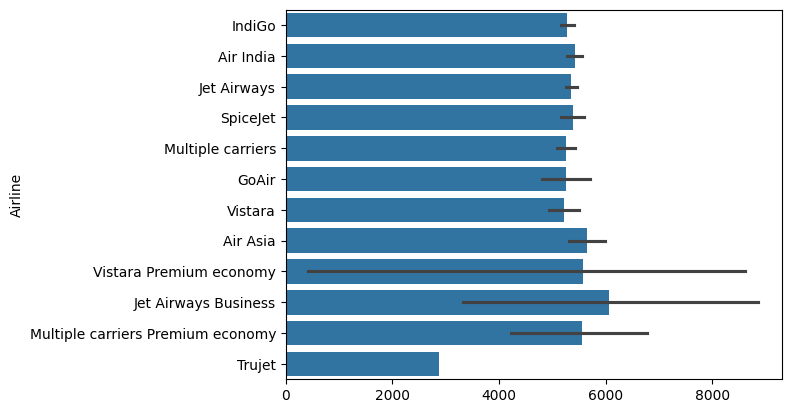

In [73]:
sns.barplot(df['Airline'])

<Axes: ylabel='Airline'>

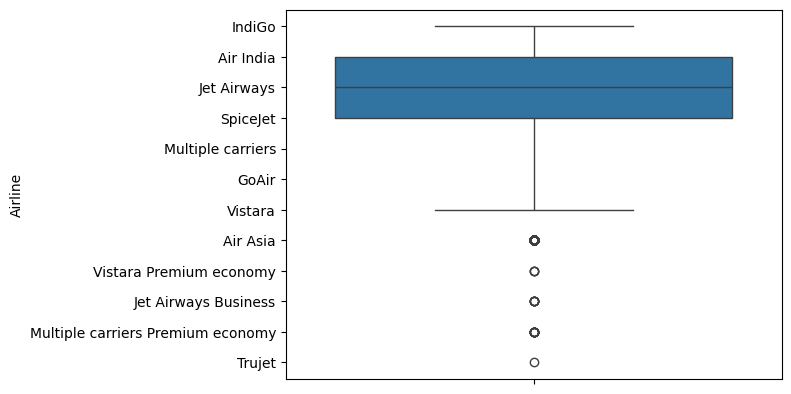

In [74]:
sns.boxplot(df['Airline'])

In [75]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<Axes: ylabel='Total_Stops'>

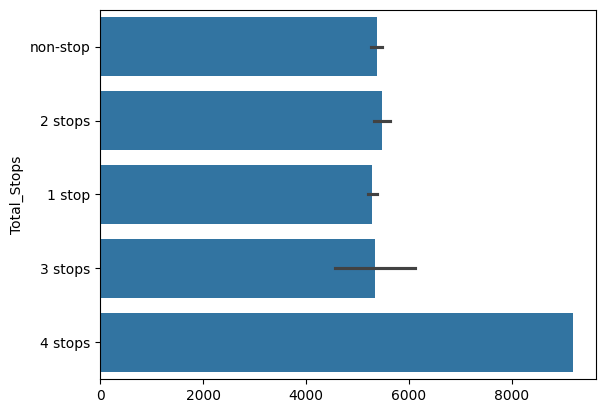

In [76]:
sns.barplot(df['Total_Stops'])

In [77]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [78]:
df['date']=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
df['month']=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
df['year']=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [79]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [80]:
df = df.drop('Date_of_Journey', axis=1)

In [81]:
df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [82]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [83]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [84]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [85]:
df['Arrival_hour'] = df['Arrival_Time'].apply(lambda x: x.split(':')[0])
df['Arrival_minute'] = df['Arrival_Time'].apply(lambda x: x.split(':')[1])

In [86]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minute'] = df['Arrival_minute'].astype(int)

In [87]:
df = df.drop('Arrival_Time', axis=1)

In [88]:
df['Dep_hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_minute'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [89]:
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_minute'] = df['Dep_minute'].astype(int)

In [90]:
df = df.drop('Dep_Time', axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   date             10683 non-null  int32 
 9   month            10683 non-null  int32 
 10  year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_minute   10683 non-null  int32 
 13  Dep_hour         10683 non-null  int32 
 14  Dep_minute       10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [92]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [93]:
df = df.drop(9039, axis =0)

In [94]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
date               0
month              0
year               0
Arrival_hour       0
Arrival_minute     0
Dep_hour           0
Dep_minute         0
dtype: int64

<Axes: ylabel='Source'>

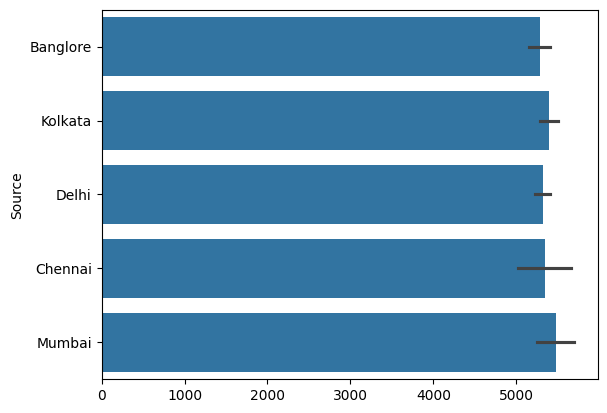

In [95]:
sns.barplot(df['Source'])

In [96]:
df['Source'] = df['Source'].map({'Banglore':1,
                                 'Kolkata':2, 
                                 'Delhi':3, 
                                 'Chennai':4, 
                                 'Mumbai':5,
                                 })

<Axes: ylabel='Destination'>

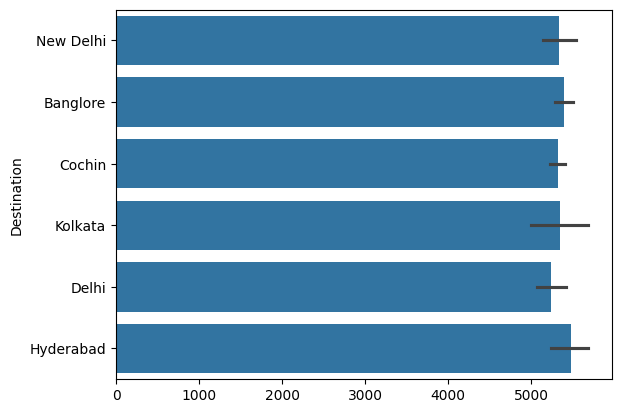

In [97]:
sns.barplot(df['Destination'])

In [98]:
df['Destination'] = df['Destination'].map({'New Delhi':1, 
                                           'Banglore':2, 
                                           'Cochin':3, 
                                           'Kolkata':4, 
                                           'Delhi':5, 
                                           'Hyderabad':6,
                                           })


In [99]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,1,1,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2,2,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,3,3,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2,2,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,1,1,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2,2,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,2,2,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,1,5,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,1,1,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [100]:
df = df.drop('Route', axis = 1 )

In [101]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,1,1,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2,2,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,3,3,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2,2,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,1,1,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2,2,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,2,2,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,1,5,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,1,1,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [102]:
def duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [103]:
df['Duration']= df['Duration'].apply(duration)

In [104]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minute'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [105]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,1,1,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2,2,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,3,3,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,2,2,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,1,1,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45
5,SpiceJet,2,2,2h 25m,non-stop,No info,3873,24,6,2019,11,25,9,0,2,25
6,Jet Airways,1,1,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,18,55,15,30
7,Jet Airways,1,1,21h 5m,1 stop,No info,22270,1,3,2019,5,5,8,0,21,5
8,Jet Airways,1,1,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,8,55,25,30
9,Multiple carriers,3,3,7h 50m,1 stop,No info,8625,27,5,2019,19,15,11,25,7,50


In [106]:
df['Duration_minute'] = df['Duration_minute'].astype(float)
df['Duration_hour'] = df['Duration_hour'].astype(float)

In [107]:
df['Duration_in_min'] = df['Duration_hour'] * 60 + df['Duration_minute']

In [108]:
df = df.drop(columns = ['Duration','Duration_hour','Duration_minute'] ,axis =1)

In [109]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['Airline'] = labelEncoder.fit_transform(df['Airline'])

In [110]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_in_min
0,3,1,1,non-stop,No info,3897,24,3,2019,1,10,22,20,170.0
1,1,2,2,2 stops,No info,7662,1,5,2019,13,15,5,50,445.0
2,4,3,3,2 stops,No info,13882,9,6,2019,4,25,9,25,1140.0
3,3,2,2,1 stop,No info,6218,12,5,2019,23,30,18,5,325.0
4,3,1,1,1 stop,No info,13302,1,3,2019,21,35,16,50,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,2,non-stop,No info,4107,9,4,2019,22,25,19,55,150.0
10679,1,2,2,non-stop,No info,4145,27,4,2019,23,20,20,45,155.0
10680,4,1,5,non-stop,No info,7229,27,4,2019,11,20,8,20,180.0
10681,10,1,1,non-stop,No info,12648,1,3,2019,14,10,11,30,160.0


<Axes: ylabel='Total_Stops'>

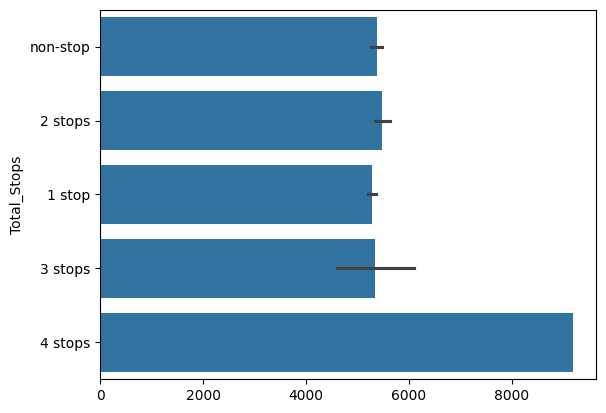

In [111]:
sns.barplot(df['Total_Stops'])

In [112]:
from sklearn.preprocessing import OrdinalEncoder
endoder = OrdinalEncoder(categories=[['4 stops','3 stops','2 stops','1 stop','non-stop']])

In [113]:
df[['Total_Stops']] = endoder.fit_transform(df[['Total_Stops']])

In [114]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_in_min
0,3,1,1,4.0,No info,3897,24,3,2019,1,10,22,20,170.0
1,1,2,2,2.0,No info,7662,1,5,2019,13,15,5,50,445.0
2,4,3,3,2.0,No info,13882,9,6,2019,4,25,9,25,1140.0
3,3,2,2,3.0,No info,6218,12,5,2019,23,30,18,5,325.0
4,3,1,1,3.0,No info,13302,1,3,2019,21,35,16,50,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,2,4.0,No info,4107,9,4,2019,22,25,19,55,150.0
10679,1,2,2,4.0,No info,4145,27,4,2019,23,20,20,45,155.0
10680,4,1,5,4.0,No info,7229,27,4,2019,11,20,8,20,180.0
10681,10,1,1,4.0,No info,12648,1,3,2019,14,10,11,30,160.0


In [115]:
df.drop(columns = 'Additional_Info',inplace=True)

In [116]:
df

,Airline,Source,Destination,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_in_min
0,3,1,1,4.0,3897,24,3,2019,1,10,22,20,170.0
1,1,2,2,2.0,7662,1,5,2019,13,15,5,50,445.0
2,4,3,3,2.0,13882,9,6,2019,4,25,9,25,1140.0
3,3,2,2,3.0,6218,12,5,2019,23,30,18,5,325.0
4,3,1,1,3.0,13302,1,3,2019,21,35,16,50,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,2,4.0,4107,9,4,2019,22,25,19,55,150.0
10679,1,2,2,4.0,4145,27,4,2019,23,20,20,45,155.0
10680,4,1,5,4.0,7229,27,4,2019,11,20,8,20,180.0
10681,10,1,1,4.0,12648,1,3,2019,14,10,11,30,160.0


In [125]:
df.dtypes

Airline              int32
Source               int64
Destination          int64
Total_Stops        float64
Price                int64
date                 int32
month                int32
year                 int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
Duration_in_min    float64
dtype: object

In [117]:
x = df.drop(columns = 'Price')
y = df['Price']

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [119]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
predictions = forest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(predictions,y_test)

0.7716504890602296

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [122]:
predictions2 = lr.predict(x_test)
r2_score(predictions,y_test)

0.7716504890602296

In [123]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(x_train,y_train)

c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
predictions3 = lr.predict(x_test)
r2_score(predictions,y_test)

0.7716504890602296